In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('iris.csv')
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
print(data.head(5))


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [6]:
print(data.tail(2))

     sepal.length  sepal.width  petal.length  petal.width    variety
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [7]:
print(data.shape)


(150, 5)


In [8]:
print(data.describe())


       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
data.duplicated().any()


True

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
X=data.iloc[:,:4].values
y=data.iloc[:,4].values

In [13]:
le=LabelEncoder()
y_new=le.fit_transform(y)


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y_new,test_size=0.25,random_state=25)


In [15]:
knn=KNeighborsClassifier(n_neighbors=13)


In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [17]:
y_predict=knn.predict(X_test)

In [18]:
print('predicted ')
print(y_predict)
print('tested')
print(y_test)

predicted 
[2 0 1 1 1 1 1 0 1 2 0 0 0 1 2 1 1 2 2 1 2 1 0 0 0 2 2 2 0 2 1 2 0 0 2 1 1
 0]
tested
[2 0 1 1 2 1 1 0 1 2 0 0 0 1 2 1 1 2 2 1 2 1 0 0 0 2 2 2 0 2 1 2 0 0 2 1 1
 0]


In [19]:
print(knn.predict_proba(X_test))

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.76923077 0.23076923]
 [0.         1.         0.        ]
 [0.         0.53846154 0.46153846]
 [0.         0.92307692 0.07692308]
 [0.         0.84615385 0.15384615]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.53846154 0.46153846]
 [0.         0.46153846 0.53846154]
 [0.         0.92307692 0.07692308]
 [0.         0.76923077 0.23076923]
 [0.         0.         1.        ]
 [0.         0.07692308 0.92307692]
 [0.         0.53846154 0.46153846]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.38461538 0.61538462]
 [0.         0.30769231 0.69230769]
 [0.         0.07692308 0.92

In [20]:
print(accuracy_score(y_test,y_predict,normalize=True))

0.9736842105263158


[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]


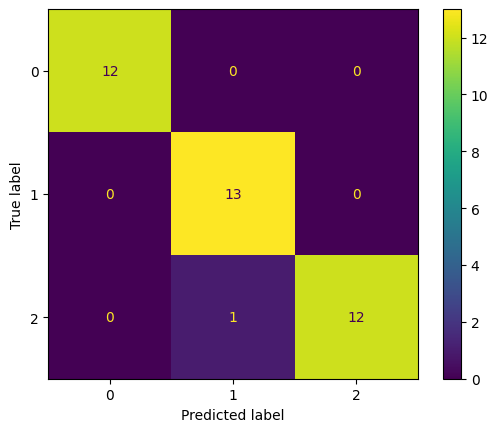

In [21]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
d=ConfusionMatrixDisplay(cm)
d.plot()
plt.show()